In [ ]:
# Basic scratchpad script to get familiar with the Messari Python API and 
# to calculate some really basic stuff around betas. 

In [1]:
# Messari API Documentation 

# Detailed description of all the available functions in the library.
# https://objective-lalande-8ec88b.netlify.app/genindex.html

# Examples here for detailed usage.
# https://github.com/messari/messari-python-api/blob/master/examples/notebooks/Messari%20API%20Tutorial.ipynb

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)  # Force the size of figures
from messari.messari import Messari
import pandas as pd

# No API key required for this script. 
messari = Messari()

In [2]:
# Set the params to grab bitcoin, ether, and solana data for the past two years.
assets = ['btc', 'eth', 'sol']
metric = 'price'
start = '2020-06-01'
end = '2022-06-21'

# Download the data
df = messari.get_metric_timeseries(asset_slugs=assets, 
                                   asset_metric=metric, 
                                   start=start, 
                                   end=end)

In [3]:
df.head()

btc                                           \
                    open          high          low         close   
timestamp                                                           
2020-06-01   9446.359337  10411.368446  9415.969996  10207.837560   
2020-06-02  10207.170730  10235.407915  9247.901259   9519.293396   
2020-06-03   9528.264497   9694.116996  9376.263171   9665.937361   
2020-06-04   9656.485925   9883.971306  9449.824258   9788.178936   
2020-06-05   9790.242751   9856.404984  9586.252232   9617.090421   

                                 eth                                      \
                  volume        open        high         low       close   
timestamp                                                                  
2020-06-01  2.546875e+09  231.418675  251.880973  230.555621  248.420898   
2020-06-02  4.445485e+09  247.088209  253.667458  224.949475  237.718348   
2020-06-03  1.789072e+09  237.857362  245.205872  233.249205  244.559197   
2020-06-04  2.183610e+09  244.445697  246.610619  235.973443  243.221280   
2020-06-05  1.965504e+09  243.344371  247.945284  239.014255  239.974526   

                               sol                                              
                  volume      open      high       low     close        volume  
timestamp                                                                       
2020-06-01  8.967023e+08  0.570326  0.598765  0.567506  0.577759  5.677525e+05  
2020-06-02  1.048456e+09  0.582023  0.587520  0.548604  0.566212  5.431773e+05  
2020-06-03  4.947757e+08  0.566023  0.592313  0.564713  0.587373  6.993870e+05  
2020-06-04  6.650226e+08  0.587990  0.592435  0.567041  0.585064  6.331571e+05  
2020-06-05  5.535803e+08  0.585561  0.699484  0.575189  0.658410  4.106817e+06

In [27]:
# Calculate CAPM beta
def beta(src, indx, ws):
    src = src.pct_change()
    indx = indx.pct_change()

    # Beta = Covariance(src,indx) / Variance(indx)
    return src.rolling(ws).cov(indx)/indx.rolling(ws).var()

In [28]:
# Window size for the correlations
window_size = 60

# Calculate the Solana betas to bitcoin and ether
sol_btc = beta(df['sol']['close'], df['btc']['close'], window_size)
sol_eth = beta(df['sol']['close'], df['eth']['close'], window_size)

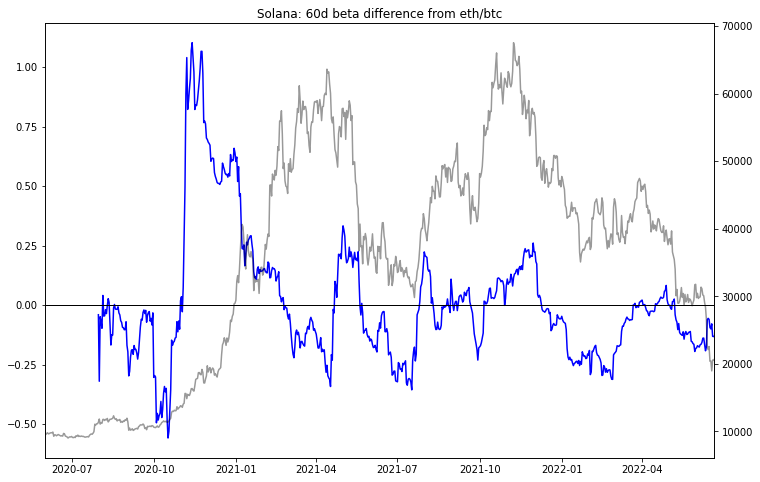

In [29]:
# Create a plot of the relative betas between the two
fig, ax = plt.subplots()
plt.title('Solana: 60d beta difference from eth/btc')
ax.plot(sol_eth-sol_btc, color='b')

# Plot the x-axis
ax.axhline(linewidth=1, color='k')

# Duplicate the x-axis and plot the btc/usd price faded in the background
ax2 = ax.twinx()
ax2.plot(df['btc']['close'], color='k', alpha=0.4)

# Tight x-axis bounds
ax2.set_xlim(df['btc']['close'].keys()[0], df['btc']['close'].keys()[-1])

# Save and display the figure
plt.savefig('relative-beta.png', transparent=False, facecolor='white')
plt.show()

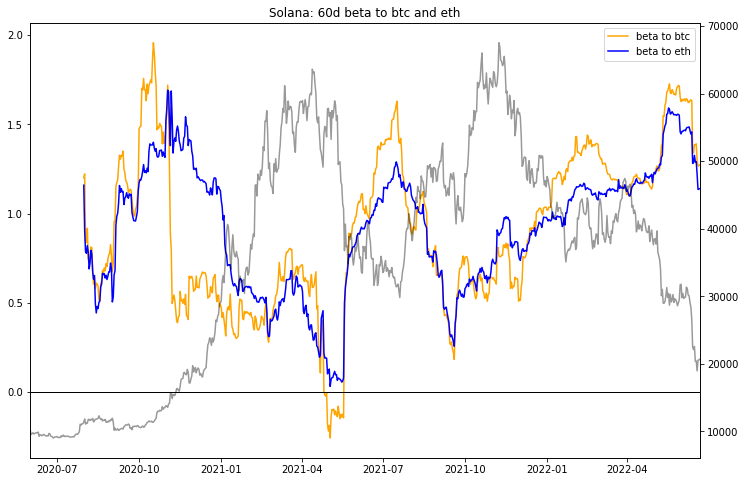

In [36]:
# Create a plot of the raw betas to bitcoin and ethere
fig, ax = plt.subplots()
plt.title('Solana: 60d beta to btc and eth')
ax.plot(sol_btc, color='orange', label='beta to btc')
ax.plot(sol_eth, color='blue', label = 'beta to eth')

# plot a legend
ax.legend()

# Plot the x-axis
ax.axhline(linewidth=1, color='k')

# Duplicate the x-axis and plot the btc/usd price faded in the background
ax2 = ax.twinx()
ax2.plot(df['btc']['close'], color='k', alpha=0.4, label='BTC/USD')

# Tight x-axis bounds
ax2.set_xlim(df['btc']['close'].keys()[0], df['btc']['close'].keys()[-1])

# Save and display the figure
plt.savefig('solana-betas.png', transparent=False, facecolor='white')
plt.show()